# Importing Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/muskanoad/Downloads/mail_data.csv")

In [2]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Pre-processing

In [4]:
# Our dataset does not have any null or missing values.
# Removing HTML tags, converting to lowercase, etc.

df['Message'] = df['Message'].str.replace(r'<[^>]*>', '', regex=True).str.lower()

In [5]:
print(df.head(5))

  Category                                            Message
0      ham  go until jurong point, crazy.. available only ...
1      ham                      ok lar... joking wif u oni...
2     spam  free entry in 2 a wkly comp to win fa cup fina...
3      ham  u dun say so early hor... u c already then say...
4      ham  nah i don't think he goes to usf, he lives aro...


# Feature Selection

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
# Converting text data into TF-IDF feature vectors

vectorizer = TfidfVectorizer(max_features=1000)  
x = vectorizer.fit_transform(df['Message'])
y = df['Category'] 

In [8]:
# Applying Best First Feature Selection (BFS)

selector = SelectKBest(chi2, k=500)  
x_selected = selector.fit_transform(x, y)

# Spam Filter Algorithms

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize classifiers
nb = MultinomialNB()
dt = DecisionTreeClassifier()

In [11]:
# Train and evaluate Naive Bayes classifier

nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)


In [12]:
# Train and evaluate Decision Tree classifier

dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Splitting the data into training & testing data

In [13]:
# Already handled in the above step with train_test_split

# Confusion Matrix

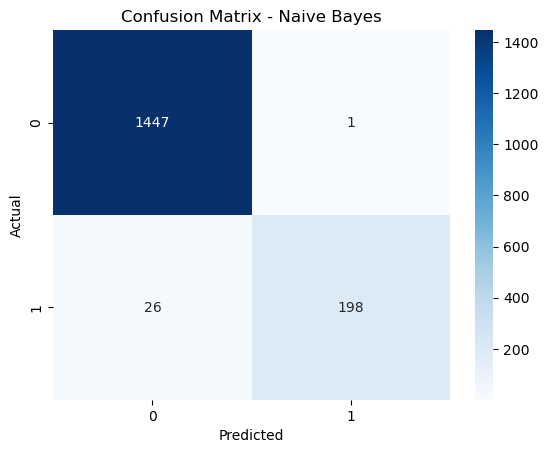

In [14]:
# Plot confusion matrix for Naive Bayes

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


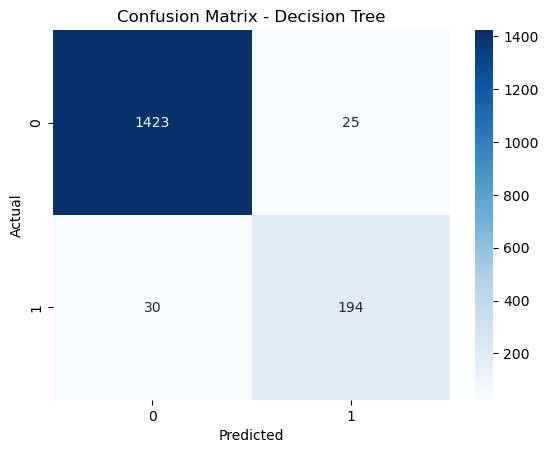

In [15]:
# Plot confusion matrix for Decision Tree

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy

In [16]:
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(f'Decision Tree Accuracy: {accuracy_dt}')

Naive Bayes Accuracy: 0.9838516746411483
Decision Tree Accuracy: 0.9671052631578947


# Predictive Model

In [17]:
import re
import pickle

def classify_email(email):
    # Load the Naive Bayes model, TF-IDF vectorizer, and feature selector
    with open('spam_classifier.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
        
    with open('vectorizer.pkl', 'rb') as vectorizer_file:
        vectorizer = pickle.load(vectorizer_file)
        
    with open('selector.pkl', 'rb') as selector_file:
        selector = pickle.load(selector_file)
        
    # Preprocess the email
    email = email.lower()
    email = re.sub(r'<[^>]*>', '', email)
    
    # Transform the email using the vectorizer
    email_vectorized = vectorizer.transform([email])
    
    # Select the features using the selector
    email_selected = selector.transform(email_vectorized)
    
    # Predict using the loaded model
    prediction = model.predict(email_selected)
    
    return prediction[0]

# Example usage
email = "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/12345 to claim now."
print(f'The email is classified as: {classify_email(email)}')


The email is classified as: spam
